In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder , OneHotEncoder
from sklearn.impute import SimpleImputer
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score , StratifiedKFold,train_test_split,GridSearchCV


TRAIN_URL = "https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv"
TEST_URL  = "https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/test.csv"

train_df= pd.read_csv(TRAIN_URL)
test_df = pd.read_csv(TEST_URL)


In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_df.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,G6,S
freq,1,577,7,4,644


In [6]:
train_df.groupby(['Pclass'],as_index=False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [7]:
train_df.groupby(['Sex'],as_index=False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [8]:
train_df.groupby(['SibSp'],as_index=False)['Survived'].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [9]:
train_df.groupby(['Parch'],as_index=False)['Survived'].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [10]:
train_df["Family_Size"] = train_df["SibSp"] + train_df["Parch"] + 1

test_df["Family_Size"] = train_df["SibSp"] + train_df["Parch"] + 1

In [11]:
train_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2


In [12]:
train_df.groupby(['Family_Size'],as_index=False)['Survived'].mean()

,Family_Size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [13]:
family_map = {1:"Alone", 2:"Small" ,3:"Small", 4:"Small",5:"Medium",6:"Medium", 7:"Large",8:"Large", 11:"Large" }

train_df["Family_Size_Grouped"] = train_df["Family_Size"].map(family_map)

test_df["Family_Size_Grouped"] = train_df["Family_Size"].map(family_map)

In [14]:
train_df.groupby(['Family_Size_Grouped'],as_index=False)['Survived'].mean()


,Family_Size_Grouped,Survived
0,Alone,0.303538
1,Large,0.160000
2,Medium,0.162162
3,Small,0.578767


In [15]:
train_df.groupby(['Embarked'],as_index=False)['Survived'].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


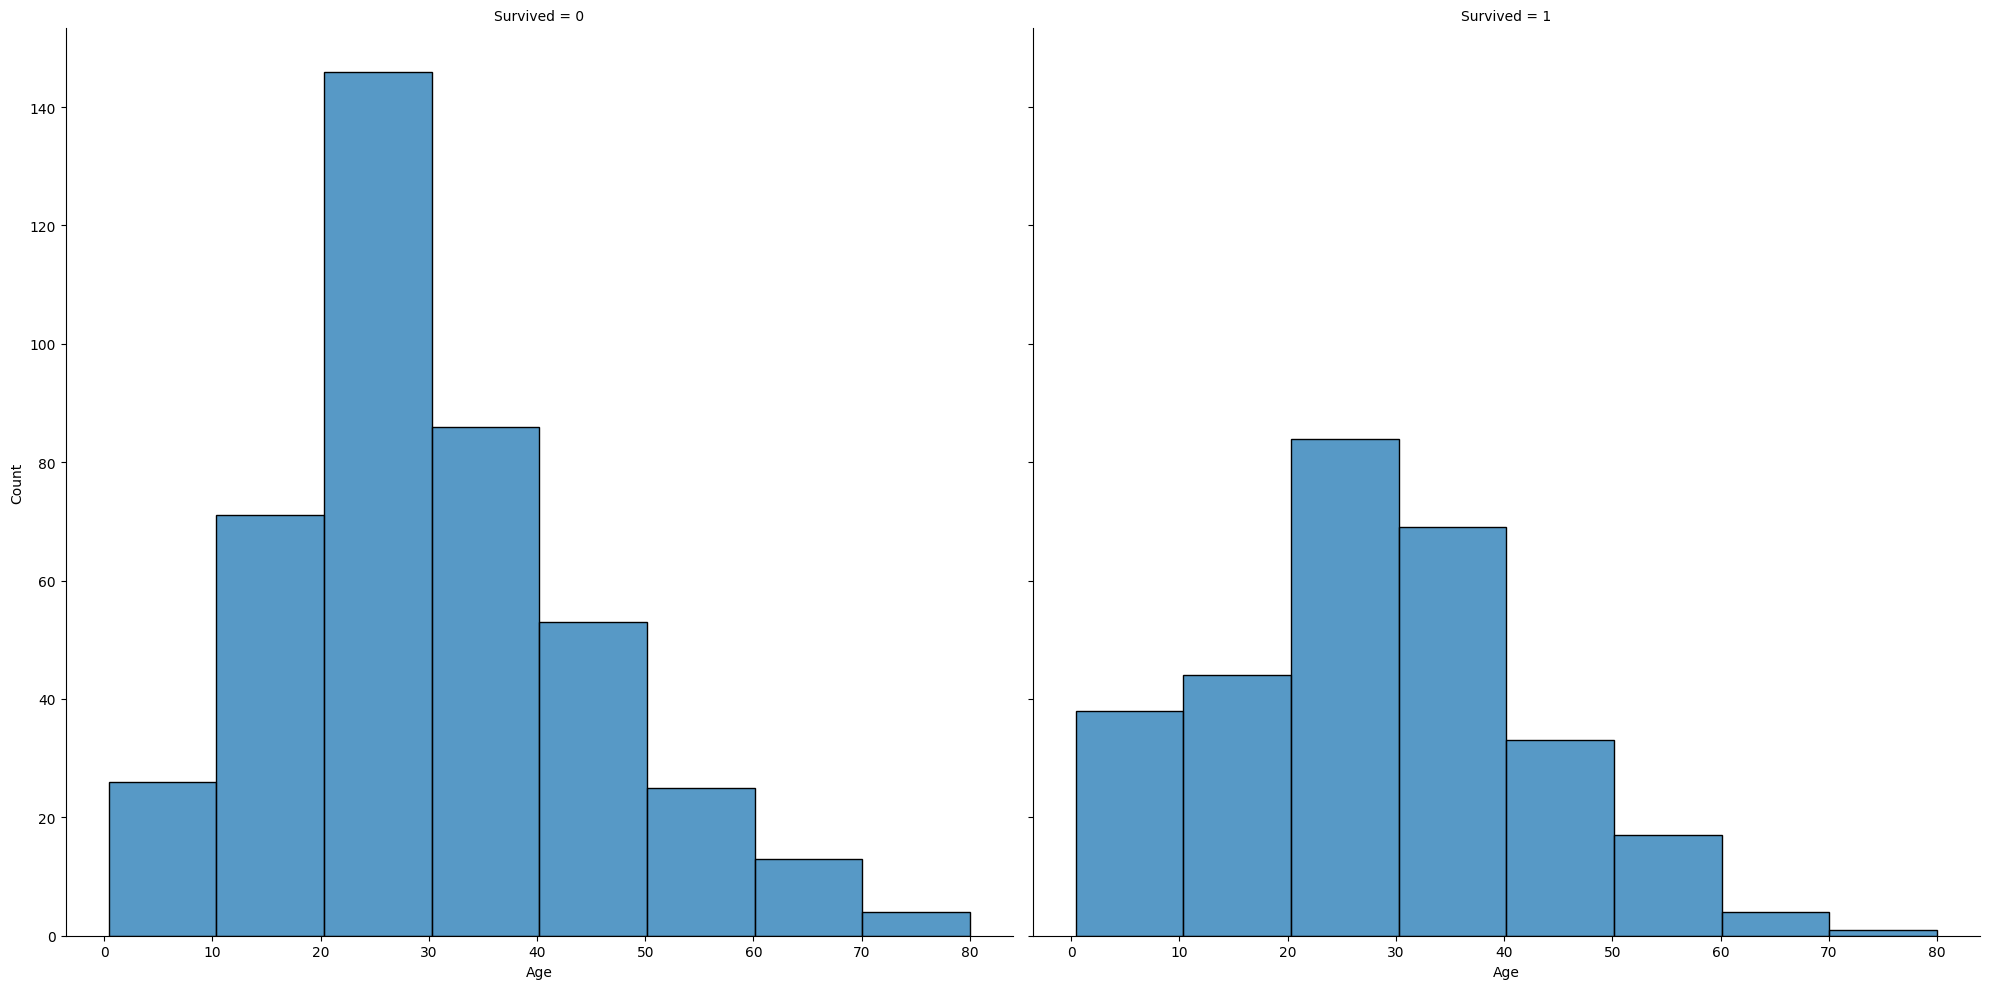

In [17]:
sns.displot(train_df, x="Age", col="Survived", binwidth=10, height=10)

In [18]:
train_df["Age_Cut"] = pd.qcut(train_df["Age"],8)
test_df["Age_Cut"] = pd.qcut(test_df["Age"],8)

In [19]:
train_df.groupby(['Age_Cut'],as_index=False)['Survived'].mean()

C:\Users\user\AppData\Local\Temp\ipykernel_2284\1170681542.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Age_Cut'],as_index=False)['Survived'].mean()


,Age_Cut,Survived
0,"(0.419, 16.0]",0.550000
1,"(16.0, 20.125]",0.341772
2,"(20.125, 24.0]",0.367347
3,"(24.0, 28.0]",0.352941
4,"(28.0, 32.312]",0.416667
5,"(32.312, 38.0]",0.450549
6,"(38.0, 47.0]",0.329545
7,"(47.0, 80.0]",0.415730


In [24]:
train_df.loc[train_df["Age"] <= 16, "Age"] = 0
train_df.loc[(train_df["Age"] > 16) & (train_df["Age"] <= 20.125), "Age"] = 1
train_df.loc[(train_df["Age"] > 20.125) & (train_df["Age"] <= 24.0), "Age"] = 2
train_df.loc[(train_df["Age"] > 24.0) & (train_df["Age"] <= 28.0), "Age"] = 3
train_df.loc[(train_df["Age"] > 28.0) & (train_df["Age"] <= 32.312), "Age"] = 4
train_df.loc[(train_df["Age"] > 32.312) & (train_df["Age"] <= 38.0), "Age"] = 5
train_df.loc[(train_df["Age"] > 38.0) & (train_df["Age"] <= 47.0), "Age"] = 6
train_df.loc[(train_df["Age"] > 47.0) & (train_df["Age"] <= 80.0), "Age"] = 7
train_df.loc[train_df["Age"] > 80, "Age"] = 8  # Assuming you want to assign a value, for example 8

test_df.loc[test_df["Age"] <= 16, "Age"] = 0
test_df.loc[(test_df["Age"] > 16) & (test_df["Age"] <= 20.125), "Age"] = 1
test_df.loc[(test_df["Age"] > 20.125) & (test_df["Age"] <= 24.0), "Age"] = 2
test_df.loc[(test_df["Age"] > 24.0) & (test_df["Age"] <= 28.0), "Age"] = 3
test_df.loc[(test_df["Age"] > 28.0) & (test_df["Age"] <= 32.312), "Age"] = 4
test_df.loc[(test_df["Age"] > 32.312) & (test_df["Age"] <= 38.0), "Age"] = 5
test_df.loc[(test_df["Age"] > 38.0) & (test_df["Age"] <= 47.0), "Age"] = 6
test_df.loc[(test_df["Age"] > 47.0) & (test_df["Age"] <= 80.0), "Age"] = 7
test_df.loc[test_df["Age"] > 80, "Age"] = 8 # Assuming you want to assign a value, for example 8

In [26]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,7.2500,NaN,S,2,Small,"(20.125, 24.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,71.2833,C85,C,2,Small,"(32.312, 38.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,"(24.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,53.1000,C123,S,2,Small,"(32.312, 38.0]"
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,8.0500,NaN,S,1,Alone,"(32.312, 38.0]"


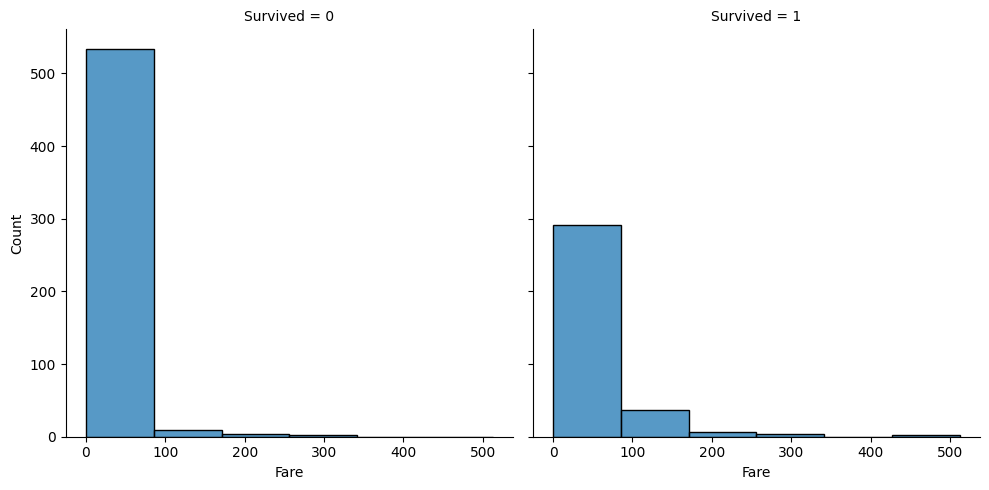

In [28]:
sns.displot( train_df,x="Fare", col="Survived", binwidth=80, height=5)

In [29]:
train_df["Fare_Cut"] = pd.qcut(train_df["Fare"],6)
test_df["Fare_Cut"] = pd.qcut(test_df["Fare"],6)

In [30]:
train_df.groupby(['Fare_Cut'],as_index=False)['Survived'].mean()

C:\Users\user\AppData\Local\Temp\ipykernel_2284\121246984.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Fare_Cut'],as_index=False)['Survived'].mean()


,Fare_Cut,Survived
0,"(-0.001, 7.775]",0.205128
1,"(7.775, 8.662]",0.190789
2,"(8.662, 14.454]",0.366906
3,"(14.454, 26.0]",0.436242
4,"(26.0, 52.369]",0.417808
5,"(52.369, 512.329]",0.697987


In [36]:
# Binning for the 'Fare' column in train_df
train_df.loc[train_df["Fare"] <= 7.775, "Fare"] = 0
train_df.loc[(train_df["Fare"] > 7.775) & (train_df["Fare"] <= 8.662), "Fare"] = 1
train_df.loc[(train_df["Fare"] > 8.662) & (train_df["Fare"] <= 14.454), "Fare"] = 2
train_df.loc[(train_df["Fare"] > 14.454) & (train_df["Fare"] <= 26.0), "Fare"] = 3
train_df.loc[(train_df["Fare"] > 26.0) & (train_df["Fare"] <= 52.369), "Fare"] = 4
train_df.loc[(train_df["Fare"] > 52.369) & (train_df["Fare"] <= 512.329), "Fare"] = 5
train_df.loc[train_df["Fare"] > 512.329, "Fare"] = 6  

# Binning for the 'Fare' column in test_df
test_df.loc[test_df["Fare"] <= 7.775, "Fare"] = 0 
test_df.loc[(test_df["Fare"] > 7.775) & (test_df["Fare"] <= 8.662), "Fare"] = 1
test_df.loc[(test_df["Fare"] > 8.662) & (test_df["Fare"] <= 14.454), "Fare"] = 2
test_df.loc[(test_df["Fare"] > 14.454) & (test_df["Fare"] <= 26.0), "Fare"] = 3
test_df.loc[(test_df["Fare"] > 26.0) & (test_df["Fare"] <= 52.369), "Fare"] = 4
test_df.loc[(test_df["Fare"] > 52.369) & (test_df["Fare"] <= 512.329), "Fare"] = 5
test_df.loc[test_df["Fare"] > 512.329, "Fare"] = 6

In [37]:
train_df["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [41]:
train_df["Name"].str.split(pat=",", expand=True)[1].str.split(pat=".", expand=True)[0]

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886      Rev
887     Miss
888     Miss
889       Mr
890       Mr
Name: 0, Length: 891, dtype: object

In [43]:
train_df["Title"] =train_df["Name"].str.split(pat=",", expand=True)[1].str.split(pat=".", expand=True)[0].apply(lambda x:x.strip())
test_df["Title"] =test_df["Name"].str.split(pat=",", expand=True)[1].str.split(pat=".", expand=True)[0].apply(lambda x:x.strip())

In [44]:
train_df.groupby(['Title'],as_index=False)['Survived'].mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


In [47]:
train_df["Title"] = train_df["Title"].replace({
    "Capt":"Military",
    "Col":"Military",
    "Major":"Military",
    "Jonkheer":"Noble",
    "the Countess":"Noble",
    "Sir":"Noble",
    "Don":"Noble",
    "Lady":"Noble",
    "Mlle":"Noble",
    "Ms":"Noble",
    "Mme":"Noble"})
    



test_df["Title"] = test_df["Title"].replace({
    "Capt":"Military",
    "Col":"Military",
    "Major":"Military",
    "Jonkheer":"Noble",
    "the Countess":"Noble",
    "Don":"Noble",
    "Lady":"Noble",
    "Mlle":"Noble",
    "Sir":"Noble",
    "Ms":"Noble",
    "Mme":"Noble"})
    
    

In [49]:
train_df.groupby(['Title'],as_index=False)['Survived'].agg(["count", "mean"])

,Title,count,mean
0,Dr,7,0.428571
1,Master,40,0.575000
2,Military,5,0.400000
3,Miss,182,0.697802
4,Mr,517,0.156673
5,Mrs,125,0.792000
6,Noble,9,0.777778
7,Rev,6,0.000000


In [50]:
train_df["Name_Length"] = train_df["Name"].apply(lambda x:len(x))
test_df["Name_Length"] = test_df["Name"].apply(lambda x:len(x))

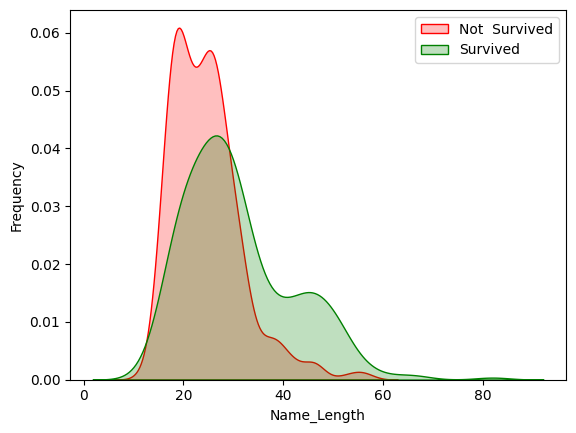

In [53]:
g= sns.kdeplot(train_df["Name_Length"][(train_df["Survived"] ==0) & (train_df["Name_Length"].notnull())], color="red", fill= True)
g= sns.kdeplot(train_df["Name_Length"][(train_df["Survived"] ==1) & (train_df["Name_Length"].notnull())],ax=g ,color="green", fill= True)

g.set_xlabel("Name_Length")
g.set_ylabel("Frequency")
g = g.legend(["Not  Survived" , "Survived"])

In [ ]:
1:04:00